# Titanic #

## Dataset loading and imports ##

### We import all the library we need and read the CSV file to create the dataframes

In [7]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

In [8]:
# Replace NaN values in train_data
train_data['Age'].fillna((train_data['Age'].mean()), inplace=True)
train_data['Embarked'].fillna('S', inplace=True)
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)

# Replace NaN values in test_data
test_data['Age'].fillna((test_data['Age'].mean()), inplace=True)
test_data['Embarked'].fillna('S', inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [9]:
#Features Engineering

# Remove all useless columns
if 'Cabin' in train_data:
    train_data = train_data.drop(columns=['Cabin'])

if 'PassengerId' in train_data:
    train_data = train_data.drop(columns=['PassengerId'])

if 'Name' in train_data:
    train_data = train_data.drop(columns=['Name'])

if 'Ticket' in train_data:
    train_data = train_data.drop(columns=['Ticket'])

# Add Clustered Age and Fare Columns to train
#train_data['ClusteredAge'] = train_data['Age'].apply(lambda x: 10*np.floor(x/10))
#train_data['ClusteredFare'] = train_data['Fare'].apply(lambda x: 100*np.floor(x/100))

# Add Clustered Age and Fare Columns to test
#test_data['ClusteredAge'] = test_data['Age'].apply(lambda x: 10*np.floor(x/10))
#test_data['ClusteredFare'] = test_data['Fare'].apply(lambda x: 100*np.floor(x/100))

## Exploratory Data Analysis ##

### We display some informations via graphs, plots, or barchart
### We try to find :

  * Usefull / Useless Features
  * Multicollinearity
  * Outliers
  * Trends

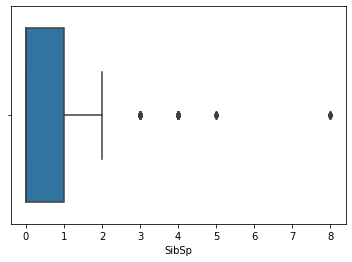

In [10]:
sns.boxplot(x=train_data['SibSp'])

In [11]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

print("women rate : ", rate_women)

women rate :  0.7420382165605095


In [12]:
men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print("men rate : ", rate_men)

men rate :  0.18890814558058924


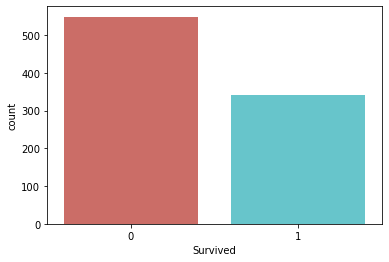

In [13]:
sns.countplot(x='Survived', data=train_data, palette='hls')
plt.show()

In [14]:
survivor_count = len(train_data[train_data.Survived == 1])
survivor_rate = survivor_count/len(train_data)
print(survivor_rate)

0.3838383838383838


In [15]:
train_data.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.415100,0.553734,0.329690,22.117887
1,1.950292,28.549778,0.473684,0.464912,48.395408


In [16]:
train_data.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893


In [17]:
train_data.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,37.048118,0.416667,0.356481,84.154687
2,0.472826,29.866958,0.402174,0.380435,20.662183
3,0.242363,26.403259,0.615071,0.393075,13.675550


In [18]:
train_data.groupby('Parch').mean()

,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,
0,0.343658,2.321534,31.604368,0.237463,25.586774
1,0.550847,2.203390,24.779771,1.084746,46.778180
2,0.500000,2.275000,19.089243,2.062500,64.337604
3,0.600000,2.600000,33.200000,1.000000,25.951660
4,0.000000,2.500000,44.500000,0.750000,84.968750
5,0.200000,3.000000,39.200000,0.600000,32.550000
6,0.000000,3.000000,43.000000,1.000000,46.900000


In [19]:
train_data.groupby('SibSp').mean()

,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,
0,0.345395,2.351974,31.014851,0.185855,25.692028
1,0.535885,2.057416,30.041134,0.655502,44.147370
2,0.464286,2.357143,23.378477,0.642857,51.753718
3,0.250000,2.562500,17.862279,1.312500,68.908862
4,0.166667,3.000000,7.055556,1.500000,31.855556
5,0.000000,3.000000,10.200000,2.000000,46.900000
8,0.000000,3.000000,29.699118,2.000000,69.550000


Text(0.5, 1.0, 'Survivor Frequency by Class')

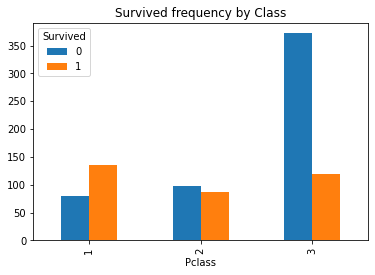

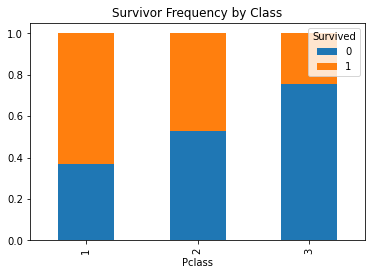

In [20]:
pd.crosstab(train_data.Pclass, train_data.Survived).plot(kind='bar')
plt.title("Survived frequency by Class")

table = pd.crosstab(train_data.Pclass, train_data.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Survivor Frequency by Class")

Text(0.5, 1.0, 'Survived frequency by Sex')

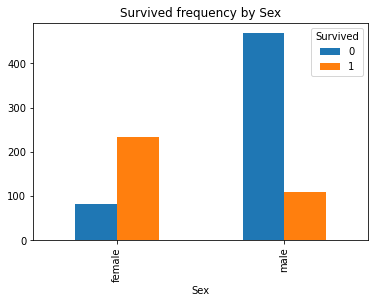

In [21]:
pd.crosstab(train_data.Sex, train_data.Survived).plot(kind='bar')
plt.title("Survived frequency by Sex")

In [22]:
pd.crosstab(train_data.ClusteredAge, train_data.Survived).apply(lambda r: r/r.sum()*100, axis=1).plot(kind='bar')
plt.title("Survived frequency by Age (Clustered)")

AttributeError: 'DataFrame' object has no attribute 'ClusteredAge'

Text(0.5, 1.0, 'Histogram of Age')

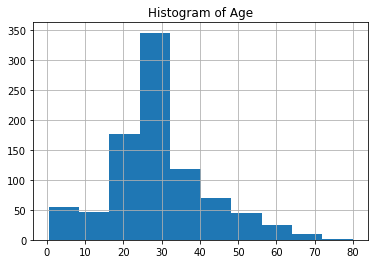

In [23]:
train_data.Age.hist()
plt.title("Histogram of Age")

Text(0.5, 1.0, 'Histogram of Fare')

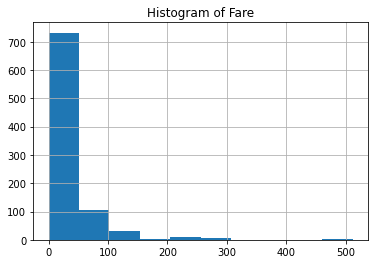

In [24]:
train_data.Fare.hist()
plt.title("Histogram of Fare")

Text(0.5, 1.0, 'Survivors by Parents / Children')

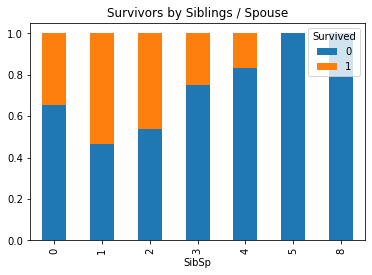

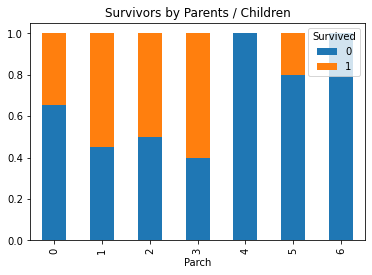

In [25]:
table = pd.crosstab(train_data.SibSp, train_data.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Survivors by Siblings / Spouse")

table = pd.crosstab(train_data.Parch, train_data.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Survivors by Parents / Children")

Text(0.5, 1.0, 'Survived by Embarking Place')

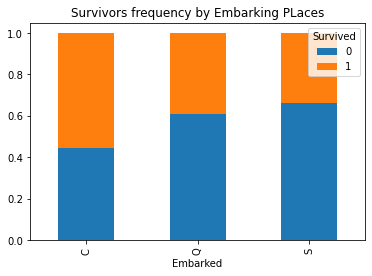

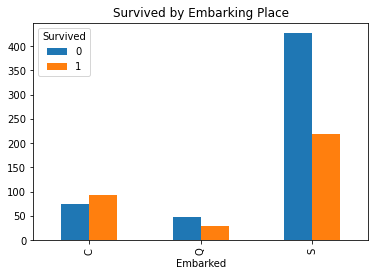

In [26]:
table = pd.crosstab(train_data.Embarked, train_data.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Survivors frequency by Embarking PLaces")

pd.crosstab(train_data.Embarked, train_data.Survived).plot(kind='bar')
plt.title("Survived by Embarking Place")

In [27]:
#Calculer le VIF pour vérifier la colinéarité des variables

#Creating Dummy Variables
cat_vars = ['Pclass','Sex','SibSp','Parch','Embarked']
for var in cat_vars:
    cat_list = pd.get_dummies(train_data[var], prefix=var)
    data1=train_data.join(cat_list)
    train_data=data1

data_vars = train_data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=train_data[to_keep]

In [28]:
#SMOT
X = data_final.loc[:, data_final.columns != 'Survived']
y = data_final.loc[:, data_final.columns == 'Survived']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Survived'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Survived']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Survived']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Survived']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Survived']==1])/len(os_data_X))

length of oversampled data is  762
Number of no subscription in oversampled data 381
Number of subscription 381
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [29]:
#Recursive Feature Elimination
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True]
[2 5 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1]


In [38]:
# I don't use the RFE here, I keep all my features

cols = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']

X=os_data_X[cols]
#X = os_data_X
y = os_data_y['Survived']

In [31]:
# Assign y to the target feature 'Survived' only and X to the others features

y = data_final['Survived']
X = data_final.drop(columns=['Survived'])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.80      0.65      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268



In [33]:
# Prepare test_data for the prediction

# Drop unused columns from test_data
if 'Cabin' in test_data:
    test_data = test_data.drop(columns=['Cabin'])

if 'Name' in test_data:
    test_data = test_data.drop(columns=['Name'])

if 'Ticket' in test_data:
    test_data = test_data.drop(columns=['Ticket'])

cat_vars = ['Pclass','Sex','SibSp','Parch','Embarked']
for var in cat_vars:
    cat_list = pd.get_dummies(test_data[var], prefix=var)
    data1=test_data.join(cat_list)
    test_data=data1

data_vars = test_data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final_test=test_data[to_keep]

passenger_list = data_final_test.PassengerId

In [34]:
# Get missing columns in the training test
missing_cols = set( X.columns ) - set( data_final_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    data_final_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
data_final_test = data_final_test[X.columns]

In [35]:
y = train_data['Survived']

features = ['Pclass', 'Sex', 'SibSp', 'Parch']
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)

print(precision_score(y_test, predictions))

0.81


In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[135,  19],
       [ 42,  72]], dtype=int64)